# LBNL Baseline Dataset Reading

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Read in Data

In [47]:
real_data = pd.read_csv("../data/lbnl/real_ahu.csv")
real_data

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,8/28/2007 0:00,75.92,55,80.61,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
1,8/28/2007 0:01,75.71,55,80.68,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
2,8/28/2007 0:02,75.71,55,80.66,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
3,8/28/2007 0:03,75.60,55,80.69,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
4,8/28/2007 0:04,75.81,55,80.60,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,5/31/2009 23:55,66.88,55,67.31,66.44,72.60,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0
21596,5/31/2009 23:56,66.77,55,67.29,66.44,72.60,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0
21597,5/31/2009 23:57,66.88,55,67.23,66.54,72.71,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0
21598,5/31/2009 23:58,66.99,55,67.21,66.54,72.71,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0


In [48]:
simulated_data = pd.read_csv("../data/lbnl/simulated_ahu.csv")
simulated_data

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,8/28/2007 0:00,77.13,55,80.61,75.86,75.19,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.06,0,1
1,8/28/2007 0:01,77.63,55,80.68,75.38,75.18,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.17,0,1
2,8/28/2007 0:02,77.87,55,80.66,75.28,75.18,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.34,0,1
3,8/28/2007 0:03,77.95,55,80.69,75.27,75.20,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.57,0,1
4,8/28/2007 0:04,78.59,55,80.60,75.29,75.24,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,1.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37435,5/15/2009 23:55,62.56,55,55.62,55.62,57.88,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.01,0,0
37436,5/15/2009 23:56,62.55,55,55.59,55.59,57.89,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.01,0,0
37437,5/15/2009 23:57,62.54,55,55.50,55.50,57.89,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.01,0,0
37438,5/15/2009 23:58,62.52,55,55.49,55.49,57.88,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.01,0,0


In [ ]:
simulated_data['Fault Detection Ground Truth']

In [ ]:
from collections import Counter
Counter(simulated_data['Fault Detection Ground Truth'])


In [ ]:
from collections import Counter
Counter(real_data['Fault Detection Ground Truth'])

## Inspecting Dates Available

In [49]:
real_data['Datetime'] = pd.to_datetime(real_data['Datetime'])
simulated_data['Datetime'] = pd.to_datetime(simulated_data['Datetime'])

In [ ]:
np.unique(real_data['Datetime'].dt.date)

The last two dates are not given in the dataset description. Since we cannot be sure whether they are faulty, let's drop them.

In [50]:
unknown_dates = ['2009-5-31', '2009-5-30'] 

for unknown_date in unknown_dates:
    real_data = real_data[real_data['Datetime'].dt.date != pd.to_datetime(unknown_date).date()]

In [ ]:
np.unique(real_data['Datetime'].dt.date)

In [ ]:
np.unique(simulated_data['Datetime'].dt.date)

Add unique IDs to each date to make sequencing the data easier

In [51]:
def add_id(df):
    df['date'] = df['Datetime'].dt.date
    df['ID'] = pd.factorize(df['date'])[0]
    df.drop('date', axis=1, inplace=True)
    
    return df

In [52]:
real_data = add_id(real_data)
simulated_data = add_id(simulated_data)

## Select only normal labels

In [53]:
real_data_normal = real_data[real_data['Fault Detection Ground Truth'] == 0]
simulated_data_normal = simulated_data[simulated_data['Fault Detection Ground Truth'] == 0]

real_data_anomaly = real_data[real_data['Fault Detection Ground Truth'] == 1]
simulated_data_anomaly = simulated_data[simulated_data['Fault Detection Ground Truth'] == 1]

## Selecting Features

In [55]:
simulated_y = simulated_data['Fault Detection Ground Truth']
real_y = real_data['Fault Detection Ground Truth']

simulated_normal_y = simulated_data_normal['Fault Detection Ground Truth']
real_normal_y = real_data_normal['Fault Detection Ground Truth']

simulated_anomaly_y = simulated_data_anomaly['Fault Detection Ground Truth']
real_anomaly_y = real_data_anomaly['Fault Detection Ground Truth']

In [56]:
non_x_columns = ['Datetime', 'Fault Detection Ground Truth', 'ID']
kept_columns = [c for c in real_data.columns if c not in non_x_columns]

real_X = real_data[kept_columns]
simulated_X = simulated_data[kept_columns]

real_normal_X = real_data_normal[kept_columns]
simulated_normal_X = simulated_data_normal[kept_columns]

real_anomaly_X = real_data_anomaly[kept_columns]
simulated_anomaly_X = simulated_data_anomaly[kept_columns]

## Normalizing Data

In [57]:
real_scaler = MinMaxScaler() # assuming you train on simulated normal and test on simulated abnormal and real.
simulated_normal_X = real_scaler.fit_transform(simulated_normal_X)
simulated_anomaly_X = real_scaler.transform(simulated_anomaly_X)

real_X = real_scaler.transform(real_X)
real_normal_X = real_scaler.transform(real_normal_X)
real_anomaly_X = real_scaler.transform(real_anomaly_X)

## Sequencing Data

In [58]:
def sequence_data(df, ids, timestep=10):
    sequenced_data = []
    
    np_df = np.array(df)
    id_array = np.array(ids)
    
    for i in range(timestep, len(id_array)):
        if id_array[i-timestep] == id_array[i]:
            sequenced_data.append(np_df[i-timestep:i])
            
    return np.array(sequenced_data)

In [108]:
num_timestep = 10
# train
sequenced_simulated_normal = sequence_data(simulated_normal_X, simulated_data_normal['ID'], timestep=num_timestep)

# test
sequenced_simulated_anomaly = sequence_data(simulated_anomaly_X, simulated_data_anomaly['ID'], timestep=num_timestep)
sequenced_real = sequence_data(real_X, real_data['ID'], timestep=num_timestep)

# validation
sequenced_real_normal = sequence_data(real_normal_X, real_data_normal['ID'], timestep=num_timestep)

In [78]:
sequenced_simulated_anomaly_y = sequence_data(simulated_anomaly_y, simulated_data_anomaly['ID'], timestep=num_timestep)
sequenced_real_y = sequence_data(real_y, real_data['ID'], timestep=num_timestep)

In [210]:
sequenced_simulated = sequence_data(simulated_X, simulated_data['ID'], timestep=num_timestep)

In [165]:
sequenced_real_y.shape

(18590, 10)

In [228]:
def sequence_labels(df, ids, timestep=10):
    sequenced_labels = []
    
    np_df = np.array(df['Fault Detection Ground Truth'])
    id_array = np.array(ids)
    
    for i in range(timestep, len(id_array)):
        if id_array[i-timestep] == id_array[i]:
            # Taking majority label for each sequence
            label = 1 if np.sum(np_df[i-timestep:i]) > (timestep / 2) else 0
            sequenced_labels.append(label)
            
    return np.array(sequenced_labels)

# Get sequenced ground truth labels
sequenced_simulated_normal_labels = sequence_labels(simulated_data_normal, simulated_data_normal['ID'], timestep=num_timestep)
sequenced_simulated_anomaly_labels = np.ones(18590)
sequenced_real_labels = sequence_labels(real_data, real_data['ID'], timestep=num_timestep)


In [60]:
print(f'Unsequenced simulated shape {simulated_normal_X.shape}')
print(f'Sequenced simluated shape {sequenced_simulated_normal.shape}')

print(f'Unsequenced simulated anomaly shape {simulated_anomaly_X.shape}')
print(f'Sequenced simulated anomaly shape {sequenced_simulated_anomaly.shape}')
print(f'Unsequenced real shape {real_normal_X.shape}')
print(f'Sequenced real shape {sequenced_real.shape}')


Unsequenced simulated shape (18720, 17)
Sequenced simluated shape (18590, 10, 17)
Unsequenced simulated anomaly shape (18720, 17)
Sequenced simulated anomaly shape (18590, 10, 17)
Unsequenced real shape (15840, 17)
Sequenced real shape (18590, 10, 17)


Let's check that the sequence makes sense for peace of mind.

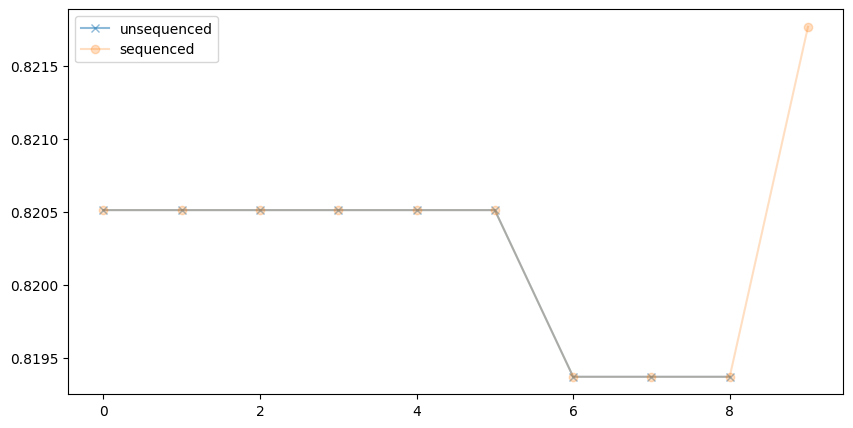

In [63]:
plt.plot(real_X[1:10,3], alpha=0.5, marker='x', label='unsequenced')
plt.plot(sequenced_real[1,0:10,3], alpha=0.25, marker='o', label='sequenced')
plt.legend()

## Autoencoder setup

In [109]:
from sklearn.model_selection import train_test_split
x_val, x_val_holdout = train_test_split(sequenced_real_normal, test_size=0.8, shuffle=False)

In [186]:
x_train = sequenced_simulated_normal
num_epochs = 30
batch_size = 32

In [124]:
from kerastuner import RandomSearch
from tensorflow.keras import regularizers

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(x_train.shape[1], x_train.shape[2])))
    
    # Encoder
    for i in range(hp.Int('num_layers', 2, 4)):
        model.add(layers.LSTM(hp.Int('units_' + str(i), min_value=4, max_value=16, step=4),
                              activation=hp.Choice('activation', ['relu', 'tanh']),
                              return_sequences=True if i < hp.Int('num_layers', 2, 4) - 1 else False,
                              kernel_regularizer=regularizers.l2(0.01)))
        model.add(layers.Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    
    model.add(layers.RepeatVector(x_train.shape[1]))
    
    # Decoder
    for i in range(hp.Int('num_layers', 2, 4) - 1, -1, -1): # Going in reverse order to symmetrically add LSTM layers
        model.add(layers.LSTM(hp.Int('units_' + str(i), min_value=4, max_value=16, step=4),
                              activation=hp.Choice('activation', ['relu', 'tanh']),
                              return_sequences=True,
                              kernel_regularizer=regularizers.l2(0.01)))
        model.add(layers.Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
        
    model.add(layers.TimeDistributed(layers.Dense(x_train.shape[2]))) # Ensure output has same shape as input
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='auto_tuner_dir',
    project_name='anomaly_detection')

tuner.search_space_summary()

tuner.search(x_train, x_train, epochs=num_epochs, batch_size=batch_size, 
             validation_data=(x_val, x_val), callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

best_model = tuner.get_best_models()[0]


Trial 10 Complete [00h 02m 15s]
val_loss: 0.05707871541380882

Best val_loss So Far: 0.04972519725561142
Total elapsed time: 00h 33m 46s
INFO:tensorflow:Oracle triggered exit


In [125]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 4)             352       
                                                                 
 dropout (Dropout)           (None, 10, 4)             0         
                                                                 
 lstm_1 (LSTM)               (None, 12)                816       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 repeat_vector (RepeatVecto  (None, 10, 12)            0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 10, 12)            1200      
                                                        

In [126]:
best_model.save("../model/best_LSTM_autoencoder.h5")

c:\Users\rheah\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


- Also try Austin's LSTM setup to make sure I didn't do anything wrong (ae_model)

In [249]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

x_train = sequenced_simulated_normal

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss for early stopping
    patience=10,         # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore model weights to the best epoch
)

ae_model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])), 
        layers.LSTM(16, activation="relu", return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(4, activation="relu", return_sequences=False),
        layers.RepeatVector(x_train.shape[1]),
        layers.LSTM(4, activation="relu", return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(16, activation="relu", return_sequences=True),
        layers.TimeDistributed(layers.Dense(x_train.shape[2])) 
    ]
) 

ae_model.compile(loss='mean_squared_error', optimizer='adam')
history = ae_model.fit(
    x_train, x_train,
    epochs=15,
    batch_size=batch_size,
    callbacks=[early_stopping]  # Add the early stopping callback
)

Epoch 1/15
581/581 [==============================] - 11s 13ms/step - loss: 0.0621
Epoch 2/15
581/581 [==============================] - 8s 14ms/step - loss: 0.0080
Epoch 3/15
581/581 [==============================] - 8s 15ms/step - loss: 0.0057
Epoch 4/15
581/581 [==============================] - 8s 14ms/step - loss: 0.0046
Epoch 5/15
581/581 [==============================] - 9s 16ms/step - loss: 0.0039
Epoch 6/15
581/581 [==============================] - 11s 19ms/step - loss: 0.0034
Epoch 7/15
581/581 [==============================] - 10s 17ms/step - loss: 0.0031
Epoch 8/15
581/581 [==============================] - 9s 15ms/step - loss: 0.0028
Epoch 9/15
581/581 [==============================] - 9s 15ms/step - loss: 0.0026
Epoch 10/15
581/581 [==============================] - 9s 16ms/step - loss: 0.0025
Epoch 11/15
581/581 [==============================] - 9s 15ms/step - loss: 0.0024
Epoch 12/15
581/581 [==============================] - 9s 16ms/step - loss: 0.0023
Epoch 13/1

## model evaluation (ae_model)

In [271]:
X_train_pred = ae_model.predict(sequenced_simulated_normal)
train_mse_loss = np.mean(np.square(X_train_pred - sequenced_simulated_normal), axis=(1, 2))

X_test_pred_simulated_anomaly = ae_model.predict(sequenced_simulated_anomaly)
test_simulated_anomaly_mse_loss = np.mean(np.square(X_test_pred_simulated_anomaly - sequenced_simulated_anomaly), axis=(1, 2))

X_test_pred_real = ae_model.predict(sequenced_real)
test_real_mse_loss = np.mean(np.square(X_test_pred_real - sequenced_real), axis=(1, 2))

581/581 [==============================] - 2s 4ms/step


In [272]:
X_test_pred_real_normal = ae_model.predict(sequenced_real_normal)
test_real_normal_mse_loss = np.mean(np.square(X_test_pred_real_normal - sequenced_real_normal), axis=(1, 2))

  1/492 [..............................] - ETA: 11s

492/492 [==============================] - 2s 4ms/step


### train on real and test on simulated to ensure our model setup is correct

In [207]:
X_train_pred = ae_model.predict(sequenced_real)
train_mse_loss = np.mean(np.square(X_train_pred - sequenced_real), axis=(1, 2))

X_test_pred_simulated_anomaly = ae_model.predict(sequenced_simulated_anomaly)
test_simulated_anomaly_mse_loss = np.mean(np.square(X_test_pred_simulated_anomaly - sequenced_simulated_anomaly), axis=(1, 2))

X_test_pred_simulated_normal = ae_model.predict(sequenced_simulated_normal)
test_simulated_normal_mse_loss = np.mean(np.square(X_test_pred_simulated_normal - sequenced_simulated_normal), axis=(1, 2))

581/581 [==============================] - 2s 4ms/step


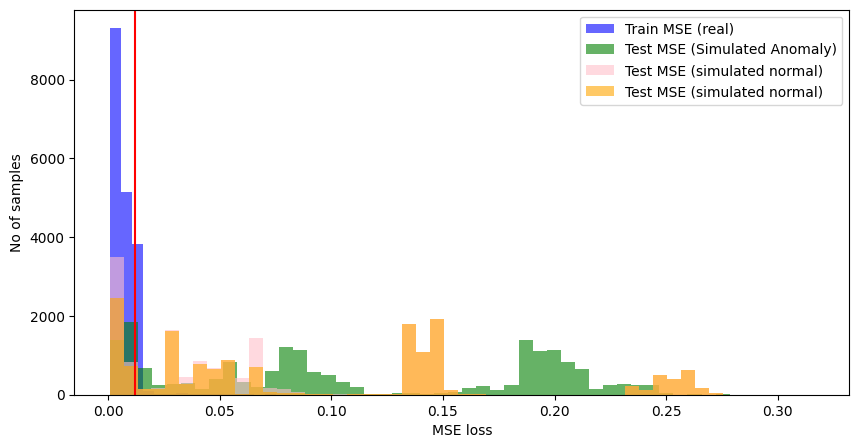

Reconstruction error threshold:  0.012102974156105216


In [274]:
# Plotting training MSE loss
plt.hist(train_mse_loss, bins=50, color='blue', alpha=0.6, label="Train MSE (real)")

# Plotting test MSE loss for simulated anomalies
plt.hist(test_simulated_anomaly_mse_loss, bins=50, color='green', alpha=0.6, label="Test MSE (Simulated Anomaly)")

plt.hist(test_real_mse_loss, bins=50, color='pink', alpha=0.6, label="Test MSE (simulated normal)")

plt.hist(test_real_normal_mse_loss, bins=50, color='orange', alpha=0.6, label="Test MSE (simulated normal)")

threshold = np.percentile(train_mse_loss, 95)
plt.axvline(x=threshold, color='red')
plt.xlabel("MSE loss")
plt.ylabel("No of samples")
plt.legend(loc='upper right')  # Displaying the legend to distinguish the histograms
plt.show()

print("Reconstruction error threshold: ", threshold)

In [212]:
X_test_pred_simulated = ae_model.predict(sequenced_simulated)
test_simulated_mse_loss = np.mean(np.square(X_test_pred_simulated - sequenced_simulated), axis=(1, 2))
sequenced_simulated_y = sequence_data(simulated_y, simulated_data['ID'], timestep=num_timestep)

1162/1162 [==============================] - 4s 4ms/step


In [276]:
from sklearn.metrics import roc_auc_score

# Generate a list of potential thresholds
thresholds = [0.01]  # 100 thresholds evenly spaced

majority_simulated_y = sequenced_real_labels

best_threshold = None
best_auc = -1

for threshold in thresholds:
    pred_simulated_label = (test_real_mse_loss > threshold).astype(int)
    auc = roc_auc_score(majority_simulated_y, pred_simulated_label)
    
    if auc > best_auc:
        best_auc = auc
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best AUC: {best_auc}")

Best Threshold: 0.01
Best AUC: 0.3978703115066751


In [270]:
test_real_mse_loss

array([0.06380356, 0.06385774, 0.0638234 , ..., 0.1442326 , 0.14423932,
       0.14427098])

### train on simulated and test on real

In [ ]:
from sklearn.metrics import roc_auc_score

# Generate a list of potential thresholds
thresholds = np.linspace(0.015, 0.1, 100)  # 100 thresholds evenly spaced

best_threshold = None
best_auc = -1

for threshold in thresholds:
    pred_real_label = (test_real_mse_loss > threshold).astype(int)
    auc = roc_auc_score(majority_real_y, pred_real_label)
    
    if auc > best_auc:
        best_auc = auc
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best AUC: {best_auc}")

In [193]:
threshold = best_threshold

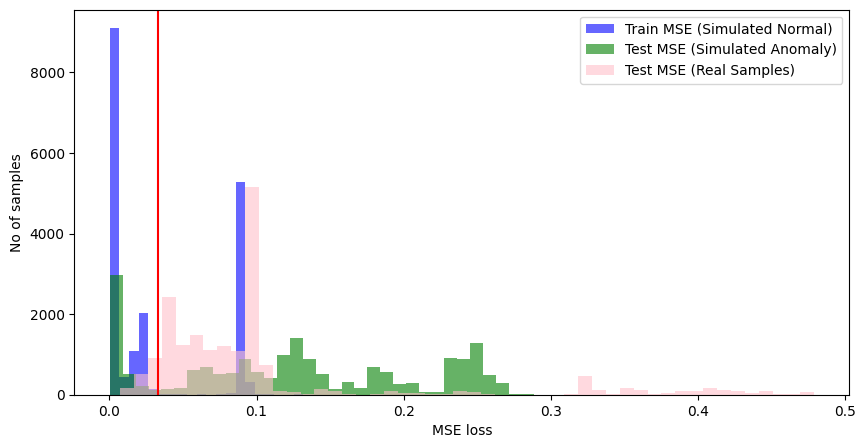

Reconstruction error threshold:  0.033030303030303035


In [194]:
# Plotting training MSE loss
plt.hist(train_mse_loss, bins=50, color='blue', alpha=0.6, label="Train MSE (Simulated Normal)")

# Plotting test MSE loss for simulated anomalies
plt.hist(test_simulated_anomaly_mse_loss, bins=50, color='green', alpha=0.6, label="Test MSE (Simulated Anomaly)")

plt.hist(test_real_mse_loss, bins=50, color='pink', alpha=0.6, label="Test MSE (Real Samples)")

plt.axvline(x=threshold, color='red')
plt.xlabel("MSE loss")
plt.ylabel("No of samples")
plt.legend(loc='upper right')  # Displaying the legend to distinguish the histograms
plt.show()

print("Reconstruction error threshold: ", threshold)


In [195]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve


pred_real_label = (test_real_mse_loss > threshold).astype(int)
majority_real_y = np.round(np.mean(sequenced_real_y, axis=1))


# Metrics
accuracy = accuracy_score(majority_real_y, pred_real_label)
f1 = f1_score(majority_real_y, pred_real_label)
conf_matrix = confusion_matrix(majority_real_y, pred_real_label)
auc = roc_auc_score(majority_real_y, pred_real_label)
fpr, tpr, _ = roc_curve(majority_real_y, pred_real_label)

print("Accuracy: ", accuracy)
print("\nf1: ", f1)
print("\nconf_matrix: ", conf_matrix)
print("\nauc: ", auc)
print("\nfpr: ", fpr)
print("\ntpr: ", tpr)

Accuracy:  0.19397525551371705

f1:  0.27480398799728967

conf_matrix:  [[  767 14963]
 [   21  2839]]

auc:  0.5207088366179274

fpr:  [0.         0.95123967 1.        ]

tpr:  [0.         0.99265734 1.        ]


In [192]:
from sklearn.metrics import roc_auc_score

# Generate a list of potential thresholds
thresholds = np.linspace(0.015, 0.1, 100)  # 100 thresholds evenly spaced

best_threshold = None
best_auc = -1

for threshold in thresholds:
    pred_real_label = (test_real_mse_loss > threshold).astype(int)
    auc = roc_auc_score(majority_real_y, pred_real_label)
    
    if auc > best_auc:
        best_auc = auc
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best AUC: {best_auc}")

Best Threshold: 0.033030303030303035
Best AUC: 0.5207088366179274


## model evaluation (best model)

In [236]:
import matplotlib.pyplot as plt

X_train_pred = best_model.predict(sequenced_simulated_normal)
train_mse_loss = np.mean(np.square(X_train_pred - sequenced_simulated_normal), axis=(1, 2))

# test
X_test_pred_simulated_anomaly = best_model.predict(sequenced_simulated_anomaly)
test_simulated_anomaly_mse_loss = np.mean(np.square(X_test_pred_simulated_anomaly - sequenced_simulated_anomaly), axis=(1, 2))

X_test_pred_real = best_model.predict(sequenced_real)
test_real_mse_loss = np.mean(np.square(X_test_pred_real - sequenced_real), axis=(1, 2))

  1/581 [..............................] - ETA: 15s

581/581 [==============================] - 2s 4ms/step


In [246]:
X_test_pred_real_normal = best_model.predict(sequenced_real_normal)
test_real_normal_mse_loss = np.mean(np.square(X_test_pred_real_normal - sequenced_real_normal), axis=(1, 2))


492/492 [==============================] - 2s 4ms/step


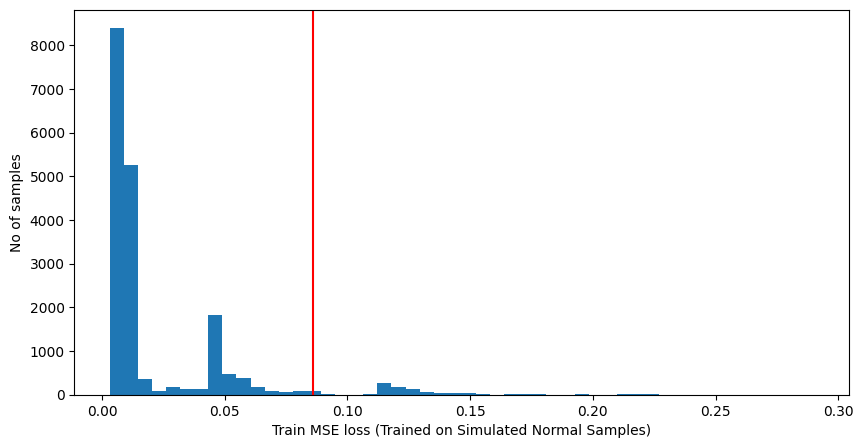

Reconstruction error threshold:  0.08585754770701202


In [237]:
threshold = np.percentile(train_mse_loss, 95)

plt.hist(train_mse_loss, bins=50)
plt.xlabel("Train MSE loss (Trained on Simulated Normal Samples)")
plt.ylabel("No of samples")
plt.axvline(x=threshold, color='red')
plt.show()

print("Reconstruction error threshold: ", threshold)

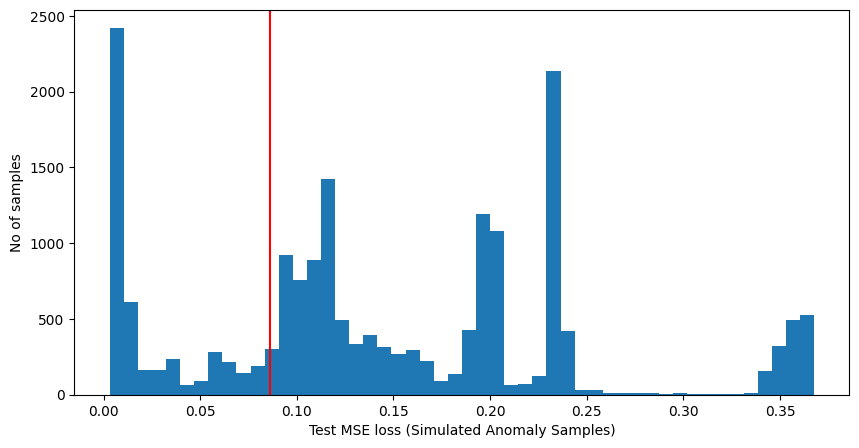

In [238]:
plt.hist(test_simulated_anomaly_mse_loss, bins=50)
plt.xlabel("Test MSE loss (Simulated Anomaly Samples)")
plt.ylabel("No of samples")
plt.axvline(x=threshold, color='red')
plt.show()

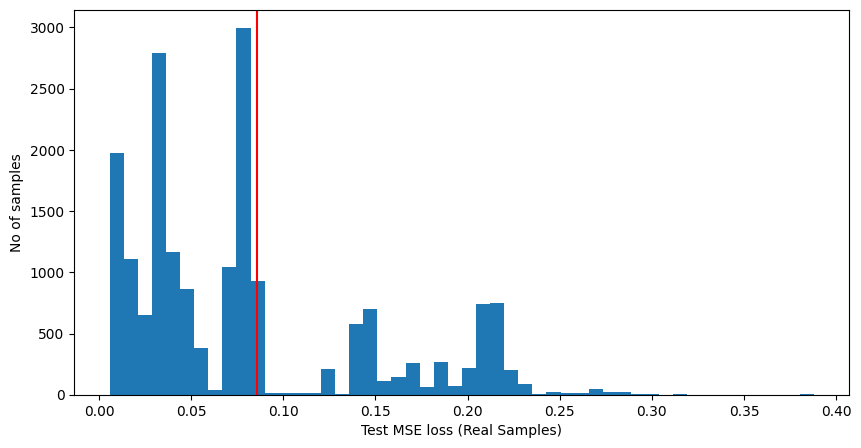

In [239]:
plt.hist(test_real_mse_loss, bins=50)
plt.xlabel("Test MSE loss (Real Samples)")
plt.ylabel("No of samples")
plt.axvline(x=threshold, color='red')
plt.show()

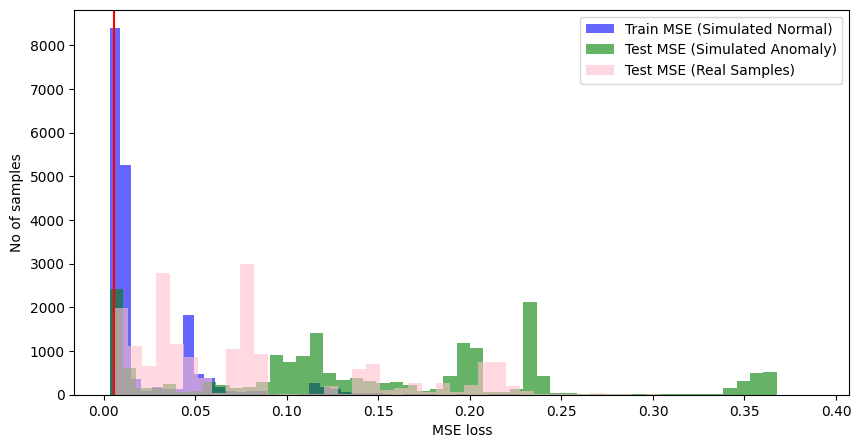

Reconstruction error threshold:  0.005740566724759848


In [248]:
# Plotting training MSE loss
plt.hist(train_mse_loss, bins=50, color='blue', alpha=0.6, label="Train MSE (Simulated Normal)")

# Plotting test MSE loss for simulated anomalies
plt.hist(test_simulated_anomaly_mse_loss, bins=50, color='green', alpha=0.6, label="Test MSE (Simulated Anomaly)")

plt.hist(test_real_mse_loss, bins=50, color='pink', alpha=0.6, label="Test MSE (Real Samples)")

plt.axvline(x=threshold, color='red')
plt.xlabel("MSE loss")
plt.ylabel("No of samples")
plt.legend(loc='upper right')  # Displaying the legend to distinguish the histograms
plt.show()

print("Reconstruction error threshold: ", threshold)


In [242]:
threshold = 0.1

In [243]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve


pred_real_label = (test_real_mse_loss > threshold).astype(int)

# Metrics
accuracy = accuracy_score(sequenced_real_labels , pred_real_label)
f1 = f1_score(sequenced_real_labels , pred_real_label)
conf_matrix = confusion_matrix(sequenced_real_labels , pred_real_label)
auc = roc_auc_score(sequenced_real_labels , pred_real_label)
fpr, tpr, _ = roc_curve(sequenced_real_labels , pred_real_label)

print("Accuracy: ", accuracy)
print("\nf1: ", f1)
print("\nconf_matrix: ", conf_matrix)
print("\nauc: ", auc)
print("\nfpr: ", fpr)
print("\ntpr: ", tpr)

Accuracy:  0.6008606777837547

f1:  0.008286554397219995

conf_matrix:  [[11139  4591]
 [ 2829    31]]

auc:  0.3594882390336936

fpr:  [0.         0.29186268 1.        ]

tpr:  [0.         0.01083916 1.        ]


In [244]:
from sklearn.metrics import roc_auc_score

# Generate a list of potential thresholds
thresholds = np.linspace(0.015, 0.1, 100)  # 100 thresholds evenly spaced

best_threshold = None
best_auc = -1

for threshold in thresholds:
    pred_real_label = (test_real_mse_loss > threshold).astype(int)
    auc = roc_auc_score(sequenced_real_labels, pred_real_label)
    
    if auc > best_auc:
        best_auc = auc
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best AUC: {best_auc}")


Best Threshold: 0.015
Best AUC: 0.44489828353464717


Optimal Threshold:  0.006127357434611039
Accuracy:  0.1560516406670253
F1:  0.26710888961554635
Confusion Matrix:  [[   42 15688]
 [    1  2859]]
AUC:  0.21536678832928038


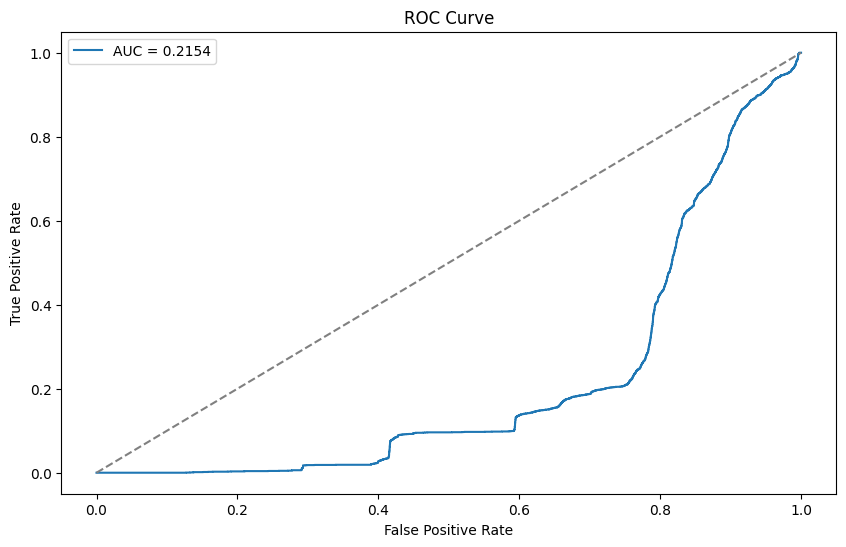

In [245]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming test_real_mse_loss contains the MSE loss for each test instance
predicted_probs = test_real_mse_loss

majority_real_y = sequenced_real_labels

# ROC Metrics
fpr, tpr, thresholds = roc_curve(majority_real_y, predicted_probs)
auc = roc_auc_score(majority_real_y, predicted_probs)

# Finding the optimal threshold based on best F1 score
best_f1 = 0
best_threshold = thresholds[0]
for threshold in thresholds:
    pred_real_label = (predicted_probs > threshold).astype(int)
    current_f1 = f1_score(majority_real_y, pred_real_label)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = threshold

# Metrics at the best threshold
pred_real_label = (predicted_probs > best_threshold).astype(int)
accuracy = accuracy_score(majority_real_y, pred_real_label)
f1 = f1_score(majority_real_y, pred_real_label)
conf_matrix = confusion_matrix(majority_real_y, pred_real_label)

print("Optimal Threshold: ", best_threshold)
print("Accuracy: ", accuracy)
print("F1: ", f1)
print("Confusion Matrix: ", conf_matrix)
print("AUC: ", auc)

# Plotting ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], '--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
